In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

def create_dataframe(file_path):
    df = pd.read_csv(file_path)

    df['device'] = file_path.split('\\')[1]
    df['app'] = file_path.split('\\')[2].strip('-W')
    df['app_details'] = file_path.split('\\')[3]
    df['type'] = file_path.split('\\')[5]

    df.to_csv(f'.\\{file_path.strip(".log")}.csv', index=False)

    return df

def process_host_gpu():
    df_aggregated = pd.DataFrame()
    for root, dirs, files in os.walk(".", topdown=False):
        for name in files:
            if name == 'host_gpu_metrics.log':
                print(os.path.join(root, name))
                df_aggregated = pd.concat([df_aggregated, create_dataframe(os.path.join(root, name))]) 
    # df_aggregated
    return df_aggregated

def process_host_sys():
    df_aggregated = pd.DataFrame()
    for root, dirs, files in os.walk(".", topdown=False):
        for name in files:
            if name == 'host_sys_metrics.log':
                print(os.path.join(root, name))
                df_aggregated = pd.concat([df_aggregated, create_dataframe(os.path.join(root, name))]) 
    # df_aggregated
    return df_aggregated


In [9]:
cpu_df = process_host_sys()
gpu_df = process_host_gpu()

.\clumsy-bandwidth-100Mbps\Quest-2\BeatSaber\PopStars-Medium\record1\host_sys_metrics.log
.\clumsy-bandwidth-100Mbps\Quest-2\BeatSaber\PopStars-Medium\replay1.0\host_sys_metrics.log
.\clumsy-bandwidth-100Mbps\Quest-2\BeatSaber\PopStars-Medium\replay1.1\host_sys_metrics.log
.\clumsy-bandwidth-100Mbps\Quest-2\BeatSaber\PopStars-Medium\replay1.2\host_sys_metrics.log
.\clumsy-bandwidth-100Mbps\Quest-Pro\BeatSaber\PopStars-Medium\record1\host_sys_metrics.log
.\clumsy-bandwidth-100Mbps\Quest-Pro\BeatSaber\PopStars-Medium\replay1.0\host_sys_metrics.log
.\clumsy-bandwidth-100Mbps\Quest-Pro\BeatSaber\PopStars-Medium\replay1.1\host_sys_metrics.log
.\clumsy-bandwidth-100Mbps\Quest-Pro\BeatSaber\PopStars-Medium\replay1.2\host_sys_metrics.log
.\clumsy-bandwidth-30Mbps\Quest-2\BeatSaber\PopStars-Medium\record1\host_sys_metrics.log
.\clumsy-bandwidth-30Mbps\Quest-2\BeatSaber\PopStars-Medium\replay1.0\host_sys_metrics.log
.\clumsy-bandwidth-30Mbps\Quest-2\BeatSaber\PopStars-Medium\replay1.1\host_sys_m

C:\Users\Paul\AppData\Local\Temp\ipykernel_8152\1682654775.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['load'] = temp['load'].apply(str)
C:\Users\Paul\AppData\Local\Temp\ipykernel_8152\1682654775.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['load'] = temp['load'].apply(float)
C:\Users\Paul\AppData\Local\Temp\ipykernel_8152\1682654775.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

[Text(0, 0.5, 'gpu util'), Text(0.5, 0, 'Quest-2')]

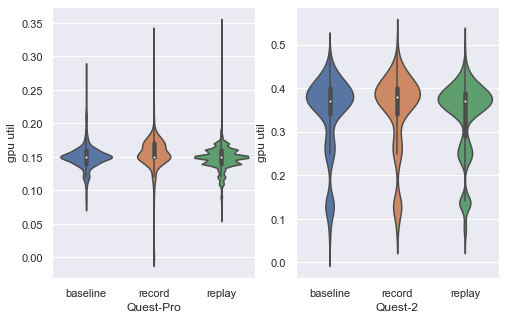

In [21]:
import matplotlib.pyplot as plt

def simplify_runs(row) :
    if "baseline" in row:
        return 'baseline'
    elif "replay" in row:
        return 'replay'
    else :
        return 'record'



temp = gpu_df[gpu_df["device"] == 'overhead-validation']
temp.drop(temp[temp['load'] == 'load'].index)

temp['load'] = temp['load'].apply(str)

temp['load'] = temp['load'].apply(float)

temp['type'] = temp['type'].apply(simplify_runs)

pro = temp[temp['app'] == 'Quest-Pro']
two = temp[temp['app'] == 'Quest-2']

fig, axes = plt.subplots(ncols=2, figsize=(8, 5))

sns.set_theme(palette='deep')
sns.violinplot(ax=axes[0], data=pro, x='type', y='load')
sns.violinplot(ax=axes[1], data=two, x='type', y='load')

axes[0].set(ylabel='gpu util', xlabel='Quest-Pro')
axes[1].set(ylabel='gpu util', xlabel='Quest-2')

